In [16]:
# 📌 Step 0: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [17]:
def generate_data(n_samples=100, n_features=3, noise_std=1.0, seed=42):
    np.random.seed(seed)
    X = 2 * np.random.rand(n_samples, n_features)
    
    # Add bias term (x0 = 1)
    X_b = np.c_[np.ones((n_samples, 1)), X]

    # Define true theta
    true_theta = np.array([[4], [3], [2], [1]])
    true_theta = true_theta[:n_features + 1]  # auto-match features

    y = X_b.dot(true_theta) + noise_std * np.random.randn(n_samples, 1)
    return X, y, X_b, true_theta


In [18]:
X, y, X_b, true_theta = generate_data()


In [19]:
def gradient_descent(X_b, y, learning_rate=0.1, n_iterations=1000):
    m = len(X_b)
    theta = np.random.randn(X_b.shape[1], 1)
    losses = []

    for _ in range(n_iterations):
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradients = 2/m * X_b.T.dot(errors)
        theta -= learning_rate * gradients
        losses.append(np.mean(errors ** 2))

    return theta, losses


In [20]:
theta, losses = gradient_descent(X_b, y)
print("📉 Learned Parameters via Gradient Descent:\n", theta)


📉 Learned Parameters via Gradient Descent:
 [[3.73501438]
 [3.13900211]
 [1.92111895]
 [1.28520294]]


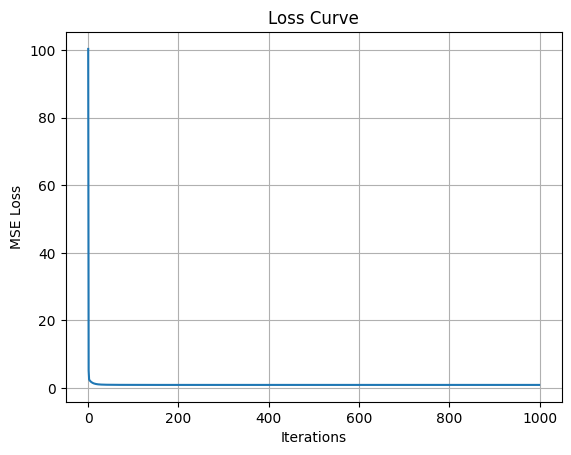

In [21]:
def plot_loss(losses):
    plt.plot(losses)
    plt.title("Loss Curve")
    plt.xlabel("Iterations")
    plt.ylabel("MSE Loss")
    plt.grid(True)
    plt.show()

plot_loss(losses)


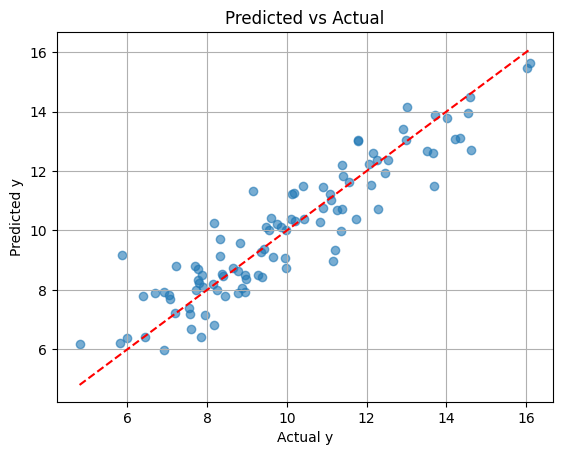

In [22]:
def plot_predictions(y_true, y_pred):
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.xlabel("Actual y")
    plt.ylabel("Predicted y")
    plt.title("Predicted vs Actual")
    plt.grid(True)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
    plt.show()

y_pred = X_b.dot(theta)
plot_predictions(y, y_pred)


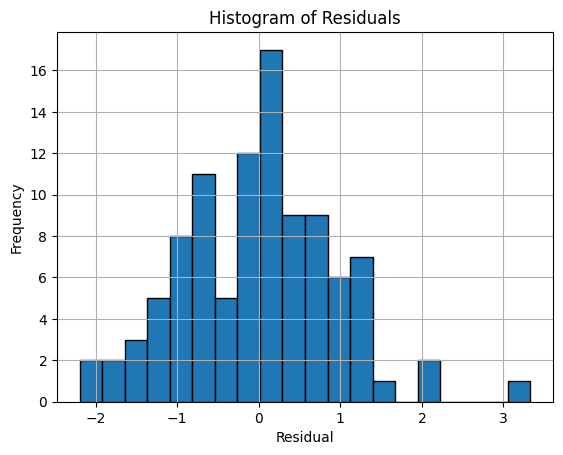

In [23]:
def plot_residuals(y_true, y_pred):
    residuals = y_pred - y_true
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_residuals(y, y_pred)


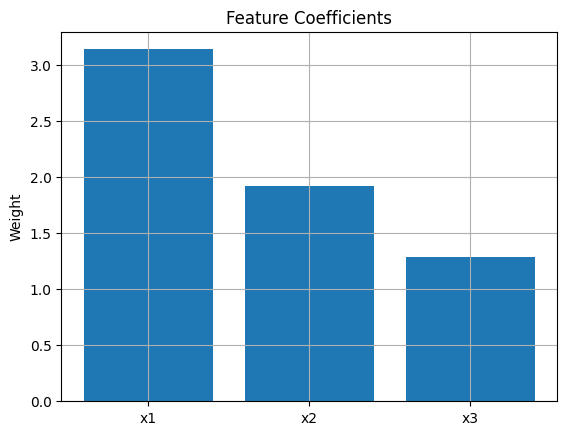

In [24]:
def plot_coefficients(theta):
    feature_names = [f"x{i+1}" for i in range(len(theta) - 1)]
    coefficients = theta[1:].flatten()  # Exclude bias term
    plt.bar(feature_names, coefficients)
    plt.title("Feature Coefficients")
    plt.ylabel("Weight")
    plt.grid(True)
    plt.show()

plot_coefficients(theta)


In [25]:
def normal_equation(X_b, y):
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_normal = normal_equation(X_b, y)
print("📐 Parameters via Normal Equation:\n", theta_normal)


📐 Parameters via Normal Equation:
 [[3.73501456]
 [3.13900206]
 [1.9211189 ]
 [1.28520288]]


In [26]:
def compare_with_sklearn(X, y):
    model = LinearRegression()
    model.fit(X, y)
    print("⚖️ Sklearn Intercept:", model.intercept_)
    print("⚖️ Sklearn Coefficients:", model.coef_)

compare_with_sklearn(X, y)


⚖️ Sklearn Intercept: [3.73501456]
⚖️ Sklearn Coefficients: [[3.13900206 1.9211189  1.28520288]]
